## Gap Junctions: Two neuron example
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/gap_junctions_two_neurons.html



In [36]:
import matplotlib.pyplot as plt
import nest
import numpy

nest.ResetKernel()

In [37]:
nest.resolution = 0.05

# neuron = nest.Create("hh_psc_alpha_gap", 2)
# https://nest-simulator.readthedocs.io/en/latest/models/hh_psc_alpha_gap.html
neuron = nest.Create("hh_cond_beta_gap_traub", 2)
# https://nest-simulator.readthedocs.io/en/latest/models/hh_cond_beta_gap_traub.html
vm = nest.Create("voltmeter", params={"interval": 0.1})


Oct 25 10:55:19 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.


In [38]:
neuron.I_e = 300.0
neuron[0].V_m = 10.0

nest.Connect(vm, neuron, "all_to_all")

In [39]:
nest.Connect(
    neuron,
    neuron,
    {"rule": "all_to_all", "allow_autapses": False},
    {"synapse_model": "gap_junction", "weight": 0.7},
)


Oct 25 10:55:19 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation. 2 of them use iterative solution 
    techniques.

Oct 25 10:55:19 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 25 10:55:19 SimulationManager::run [Info]: 
    Simulation finished.


Text(0, 0.5, 'membrane potential (mV)')

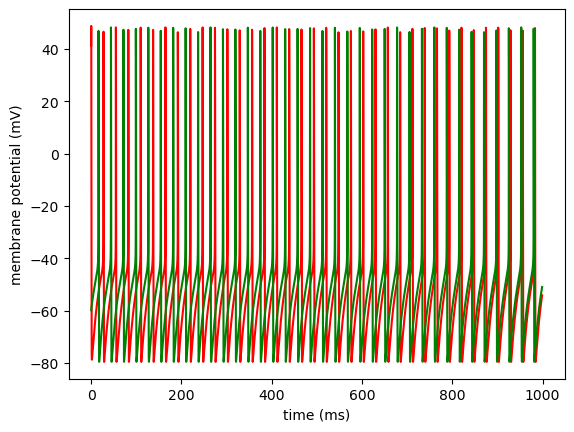

In [40]:
nest.Simulate(1000.0)

senders = vm.events["senders"]
times = vm.events["times"]
v_m_values = vm.events["V_m"]

plt.figure(1)
plt.plot(times[numpy.where(senders == 1)], v_m_values[numpy.where(senders == 1)], "r-")
plt.plot(times[numpy.where(senders == 2)], v_m_values[numpy.where(senders == 2)], "g-")
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")